# Objective :
The objective of the project is to learn how to implement a simple image classification pipeline based on a deep neural network.

# Data Description:
<b>The Street View House Numbers (SVHN) Dataset</b>

SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data formatting but comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

<b>Link to the dataset:</b><br />
https://drive.google.com/file/d/1L2-WXzguhUsCArrFUc8EEkXcj33pahoS/view?usp=sharing

## 1. Import the Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import h5py
import tensorflow as tf
from tensorflow.keras import Sequential, optimizers
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout

## 2. Load Dataset and understand the train/val/test splits

In [2]:
data = h5py.File('SVHN_single_grey1.h5','r')

print(data.keys())

#Load the training, testing, and validation data
X_train = data['X_train'][:]
y_train = data['y_train'][:]
X_test = data['X_test'][:]
y_test = data['y_test'][:]
X_val = data['X_val'][:]
y_val = data['y_val'][:]

data.close()

# Printing the shape of training, testing, and validation data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>
(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)
(60000, 32, 32)
(60000,)


### Visualizing the dataset

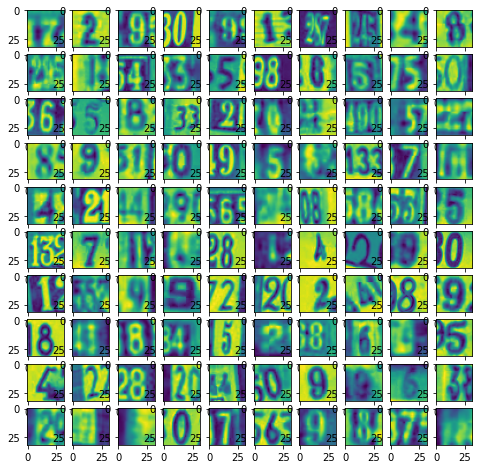

In [3]:
fig=plt.figure(figsize=(8,8))
columns=10
rows=10
for i in range(1, columns*rows+1):
    img=X_test[i]
    fig.add_subplot(rows,columns,i)
    plt.imshow(img)
plt.show()

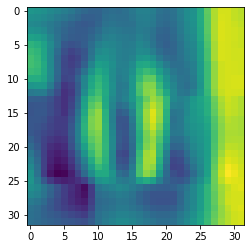

y (training):  0


In [4]:
#Show a random image in the training set.
plt.imshow(X_train[100])     
plt.show() 
print('y (training): ', y_train[100])

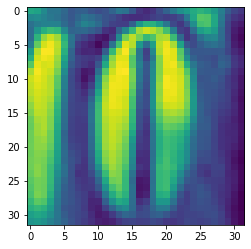

y (validation):  0


In [5]:
#Show a random image in the validation set.
plt.imshow(X_val[100])     
plt.show() 
print('y (validation): ', y_val[100])

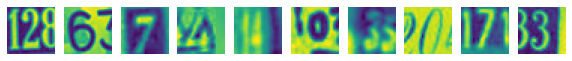

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [6]:
# visualizing the first 10 images in the training dataset and their labels
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32,32))
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [7]:
# Reshape the features from 32×32 into a single dimensional array of 1024 features in total.
X_train = np.asarray(X_train).reshape(42000,1024)
X_test = np.asarray(X_test).reshape(18000,1024)
X_val = np.asarray(X_val).reshape(60000,1024)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(42000, 1024)
(18000, 1024)
(60000, 1024)


In [8]:
# Normalize the data from 0-255 to 0-1 by dividing the inputs by 255. The denominator should be a float, 
# else the output would become 0.
X_train = X_train / 255.0 
X_test = X_test / 255.0
X_val = X_val / 255.0

In [9]:
# We should check the proportion of each class in the target variable to ensure there is no imbalance in the ground truth values.
for i in range(0,10):
    print("Label: {0} | Value % = {1}".format( i, (y_train[y_train == i].size / y_train.size)*100) )

Label: 0 | Value % = 9.966666666666667
Label: 1 | Value % = 9.933333333333334
Label: 2 | Value % = 9.992857142857142
Label: 3 | Value % = 10.192857142857143
Label: 4 | Value % = 9.971428571428572
Label: 5 | Value % = 10.076190476190476
Label: 6 | Value % = 9.923809523809524
Label: 7 | Value % = 9.980952380952381
Label: 8 | Value % = 9.971428571428572
Label: 9 | Value % = 9.99047619047619


## 3. Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations)

In [10]:
#Converting output label to multiple values
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_1 = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)
print(X_train.shape, X_test.shape,X_val.shape, y_train.shape, y_test_1.shape,y_val.shape)

(42000, 1024) (18000, 1024) (60000, 1024) (42000, 10) (18000, 10) (60000, 10)


In [11]:
#Initialize the Artificial Neural Network Classifier
keras_model = Sequential()

In [12]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model.add(Dense(256, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model.add(Dense(128, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model.add(Dense(64, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model.add(Dense(32, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model.add(Activation('softmax'))

In [13]:
keras_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

In [14]:
# Using SGD optimizer and Categorical Crossentropy as loss function and Accuracy as the metric to monitor
# compiling the ANN classifier
sgd = optimizers.SGD()
keras_model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [15]:
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 4s 94us/sample - loss: 2.2940 - accuracy: 0.1223 - val_loss: 2.2751 - val_accuracy: 0.1430
Epoch 2/10
42000/42000 [==============================] - 4s 83us/sample - loss: 2.2566 - accuracy: 0.1782 - val_loss: 2.2327 - val_accuracy: 0.2104
Epoch 3/10
42000/42000 [==============================] - 3s 83us/sample - loss: 2.2061 - accuracy: 0.2186 - val_loss: 2.1716 - val_accuracy: 0.2312
Epoch 4/10
42000/42000 [==============================] - 3s 82us/sample - loss: 2.1272 - accuracy: 0.2658 - val_loss: 2.0753 - val_accuracy: 0.2888
Epoch 5/10
42000/42000 [==============================] - 4s 89us/sample - loss: 2.0068 - accuracy: 0.3121 - val_loss: 1.9155 - val_accuracy: 0.3751
Epoch 6/10
42000/42000 [==============================] - 4s 97us/sample - loss: 1.8866 - accuracy: 0.3491 - val_loss: 1.7688 - val_accuracy: 0.4261
Epoch 7/10
42000/42000 [==============================] 

#### The accuracy of the model on validation data is quite low using SGD over 10 epochs.

In [16]:
# Using Adam optimizer and Categorical Crossentropy as loss function and Accuracy as the metric to monitor
# compiling the ANN classifier
adam = optimizers.Adam()
keras_model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 5s 118us/sample - loss: 1.8278 - accuracy: 0.3712 - val_loss: 1.3990 - val_accuracy: 0.5457
Epoch 2/10
42000/42000 [==============================] - 4s 92us/sample - loss: 1.2973 - accuracy: 0.5838 - val_loss: 1.1272 - val_accuracy: 0.6536
Epoch 3/10
42000/42000 [==============================] - 4s 92us/sample - loss: 1.1440 - accuracy: 0.6377 - val_loss: 1.0771 - val_accuracy: 0.6612
Epoch 4/10
42000/42000 [==============================] - 4s 93us/sample - loss: 1.0274 - accuracy: 0.6783 - val_loss: 0.9624 - val_accuracy: 0.6985
Epoch 5/10
42000/42000 [==============================] - 4s 93us/sample - loss: 0.9574 - accuracy: 0.7005 - val_loss: 0.9501 - val_accuracy: 0.7017
Epoch 6/10
42000/42000 [==============================] - 4s 85us/sample - loss: 0.8990 - accuracy: 0.7194 - val_loss: 1.0225 - val_accuracy: 0.6774
Epoch 7/10
42000/42000 [==============================]

#### The accuracy of the model on validation data is moderately low using Adam over 10 epochs.

In [18]:
# Now, we'll try to change the learning rate in SGD optimizer.
# As we are taking learning rate small means model will learn slowly. So, we have to take more number of epochs.
#Setting the learning rate  and decay in sgd
sgd = optimizers.SGD(lr = 0.0001)
# compiling the ANN classifier
keras_model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 4s 96us/sample - loss: 0.6733 - accuracy: 0.7915 - val_loss: 0.6818 - val_accuracy: 0.7926
Epoch 2/100
42000/42000 [==============================] - 5s 107us/sample - loss: 0.6494 - accuracy: 0.8015 - val_loss: 0.6715 - val_accuracy: 0.7962
Epoch 3/100
42000/42000 [==============================] - 5s 119us/sample - loss: 0.6425 - accuracy: 0.8033 - val_loss: 0.6670 - val_accuracy: 0.7972
Epoch 4/100
42000/42000 [==============================] - 4s 89us/sample - loss: 0.6388 - accuracy: 0.8042 - val_loss: 0.6640 - val_accuracy: 0.7979
Epoch 5/100
42000/42000 [==============================] - 3s 82us/sample - loss: 0.6361 - accuracy: 0.8048 - val_loss: 0.6617 - val_accuracy: 0.7986
Epoch 6/100
42000/42000 [==============================] - 3s 81us/sample - loss: 0.6338 - accuracy: 0.8058 - val_loss: 0.6598 - val_accuracy: 0.7996
Epoch 7/100
42000/42000 [=======================

Epoch 55/100
42000/42000 [==============================] - 4s 91us/sample - loss: 0.6044 - accuracy: 0.8150 - val_loss: 0.6339 - val_accuracy: 0.8078
Epoch 56/100
42000/42000 [==============================] - 4s 90us/sample - loss: 0.6042 - accuracy: 0.8150 - val_loss: 0.6337 - val_accuracy: 0.8080
Epoch 57/100
42000/42000 [==============================] - 4s 84us/sample - loss: 0.6040 - accuracy: 0.8151 - val_loss: 0.6335 - val_accuracy: 0.8079
Epoch 58/100
42000/42000 [==============================] - 3s 80us/sample - loss: 0.6037 - accuracy: 0.8151 - val_loss: 0.6333 - val_accuracy: 0.8080
Epoch 59/100
42000/42000 [==============================] - 3s 81us/sample - loss: 0.6035 - accuracy: 0.8150 - val_loss: 0.6330 - val_accuracy: 0.8080
Epoch 60/100
42000/42000 [==============================] - 3s 81us/sample - loss: 0.6033 - accuracy: 0.8150 - val_loss: 0.6329 - val_accuracy: 0.8083
Epoch 61/100
42000/42000 [==============================] - 3s 81us/sample - loss: 0.6031 - ac

#### The accuracy of the model on validation data using SGD with learning rate=0.0001 has improved significantly.

In [19]:
results = keras_model.evaluate(X_val, y_val)
print('Validation Accuracy using SGD optimizer in a simple NN : ', results[1])

60000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Validation Accuracy using SGD optimizer in a simple NN :  0.80981666


In [20]:
#Store the accuracy results for each model in a dataframe for final comparison
results_on_val = pd.DataFrame({'Method':['NN_SGD'], 'accuracy': results[1]},index={'1'})
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

Method  accuracy
1  NN_SGD  0.809817

In [21]:
# Now, let's try to change the learning rate in ADAM optimizer.
# As, we are taking learning rate small means model will learn slowly. So, we have to take more number of epochs.
#Setting the learning rate  and decay in Adam
adam = optimizers.Adam(lr = 0.0001)
# compiling the ANN classifier
keras_model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 4s 104us/sample - loss: 0.6103 - accuracy: 0.8123 - val_loss: 0.6243 - val_accuracy: 0.8103
Epoch 2/100
42000/42000 [==============================] - 4s 86us/sample - loss: 0.5989 - accuracy: 0.8154 - val_loss: 0.6220 - val_accuracy: 0.8108
Epoch 3/100
42000/42000 [==============================] - 4s 86us/sample - loss: 0.5890 - accuracy: 0.8180 - val_loss: 0.6145 - val_accuracy: 0.8132
Epoch 4/100
42000/42000 [==============================] - 4s 86us/sample - loss: 0.5801 - accuracy: 0.8216 - val_loss: 0.6239 - val_accuracy: 0.8063
Epoch 5/100
42000/42000 [==============================] - 4s 86us/sample - loss: 0.5733 - accuracy: 0.8239 - val_loss: 0.5941 - val_accuracy: 0.8198
Epoch 6/100
42000/42000 [==============================] - 4s 86us/sample - loss: 0.5637 - accuracy: 0.8261 - val_loss: 0.5855 - val_accuracy: 0.8233
Epoch 7/100
42000/42000 [========================

Epoch 55/100
42000/42000 [==============================] - 4s 88us/sample - loss: 0.3304 - accuracy: 0.8995 - val_loss: 0.4203 - val_accuracy: 0.8774
Epoch 56/100
42000/42000 [==============================] - 4s 89us/sample - loss: 0.3274 - accuracy: 0.9007 - val_loss: 0.4137 - val_accuracy: 0.8795
Epoch 57/100
42000/42000 [==============================] - 4s 88us/sample - loss: 0.3278 - accuracy: 0.8994 - val_loss: 0.4093 - val_accuracy: 0.8808
Epoch 58/100
42000/42000 [==============================] - 4s 88us/sample - loss: 0.3191 - accuracy: 0.9039 - val_loss: 0.4101 - val_accuracy: 0.8817
Epoch 59/100
42000/42000 [==============================] - 4s 87us/sample - loss: 0.3159 - accuracy: 0.9048 - val_loss: 0.4084 - val_accuracy: 0.8816
Epoch 60/100
42000/42000 [==============================] - 4s 89us/sample - loss: 0.3138 - accuracy: 0.9038 - val_loss: 0.4049 - val_accuracy: 0.8831
Epoch 61/100
42000/42000 [==============================] - 4s 88us/sample - loss: 0.3105 - ac

#### The accuracy of the model on val data using ADAM with learning rate=0.0001 has shown significant improvement.

In [22]:
results = keras_model.evaluate(X_val, y_val)
print('Validation Accuracy using simple NN adam : ', results[1])

60000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Validation Accuracy using simple NN adam :  0.90933335


In [23]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_adam'], 'accuracy': [results[1]]},index={'2'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

Method  accuracy
1   NN_SGD  0.809817
2  NN_adam  0.909333

## 4. Implementing batch normalization for training the neural network

In [24]:
# Initialize the Artificial Neural Network Classifier
keras_model_1 = Sequential()

In [25]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_1.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_1.add(Dense(256, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_1.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_1.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_1.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_1.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_1.add(Activation('softmax'))

In [26]:
keras_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation_6 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)              

In [27]:
# Using SGD optimizer
sgd = optimizers.SGD()
# compiling the ANN classifier
keras_model_1.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training data
history_1 = keras_model_1.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 5s 111us/sample - loss: 2.2645 - accuracy: 0.1872 - val_loss: 2.1960 - val_accuracy: 0.2103
Epoch 2/10
42000/42000 [==============================] - 3s 76us/sample - loss: 1.9150 - accuracy: 0.3529 - val_loss: 1.8562 - val_accuracy: 0.3897
Epoch 3/10
42000/42000 [==============================] - 3s 80us/sample - loss: 1.6694 - accuracy: 0.4710 - val_loss: 1.6166 - val_accuracy: 0.4897
Epoch 4/10
42000/42000 [==============================] - 4s 84us/sample - loss: 1.4643 - accuracy: 0.5557 - val_loss: 1.4469 - val_accuracy: 0.5552
Epoch 5/10
42000/42000 [==============================] - 3s 79us/sample - loss: 1.2976 - accuracy: 0.6129 - val_loss: 1.2785 - val_accuracy: 0.6125
Epoch 6/10
42000/42000 [==============================] - 3s 82us/sample - loss: 1.1662 - accuracy: 0.6550 - val_loss: 1.1747 - val_accuracy: 0.6379
Epoch 7/10
42000/42000 [==============================]

#### The accuracy of the batch normalised model on validation data is quite low using SGD over 10 epochs.

In [28]:
# Now, we'll try to increase the epochs.
history_1 = keras_model_1.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 3s 78us/sample - loss: 0.7995 - accuracy: 0.7564 - val_loss: 0.8499 - val_accuracy: 0.7376
Epoch 2/100
42000/42000 [==============================] - 3s 78us/sample - loss: 0.7574 - accuracy: 0.7692 - val_loss: 0.8570 - val_accuracy: 0.7308
Epoch 3/100
42000/42000 [==============================] - 4s 88us/sample - loss: 0.7196 - accuracy: 0.7766 - val_loss: 0.8881 - val_accuracy: 0.7189
Epoch 4/100
42000/42000 [==============================] - 4s 101us/sample - loss: 0.6833 - accuracy: 0.7933 - val_loss: 0.8489 - val_accuracy: 0.7345
Epoch 5/100
42000/42000 [==============================] - 4s 100us/sample - loss: 0.6545 - accuracy: 0.7996 - val_loss: 0.8046 - val_accuracy: 0.7458
Epoch 6/100
42000/42000 [==============================] - 5s 107us/sample - loss: 0.6220 - accuracy: 0.8073 - val_loss: 0.7490 - val_accuracy: 0.7651
Epoch 7/100
42000/42000 [======================

42000/42000 [==============================] - 4s 107us/sample - loss: 0.1433 - accuracy: 0.9595 - val_loss: 0.8852 - val_accuracy: 0.7631
Epoch 55/100
42000/42000 [==============================] - 4s 106us/sample - loss: 0.1429 - accuracy: 0.9592 - val_loss: 0.5885 - val_accuracy: 0.8405
Epoch 56/100
42000/42000 [==============================] - 4s 107us/sample - loss: 0.1373 - accuracy: 0.9601 - val_loss: 0.6679 - val_accuracy: 0.8161
Epoch 57/100
42000/42000 [==============================] - 4s 106us/sample - loss: 0.1324 - accuracy: 0.9618 - val_loss: 0.5801 - val_accuracy: 0.8407
Epoch 58/100
42000/42000 [==============================] - 4s 107us/sample - loss: 0.1306 - accuracy: 0.9625 - val_loss: 0.6768 - val_accuracy: 0.8231
Epoch 59/100
42000/42000 [==============================] - 5s 109us/sample - loss: 0.1262 - accuracy: 0.9632 - val_loss: 0.6155 - val_accuracy: 0.8365
Epoch 60/100
42000/42000 [==============================] - 5s 108us/sample - loss: 0.1275 - accuracy

#### The accuracy of the batch normalised model using SGD on validation data significantly improved over 100 epochs.

In [29]:
results_1 = keras_model_1.evaluate(X_val, y_val)
print('Validation Accuracy using SGD optimizer in a BatchNorm NN : : ', results_1[1])

60000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Validation Accuracy using SGD optimizer in a BatchNorm NN : :  0.90045


In [30]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Batch_NN_SGD'], 'accuracy': [results_1[1]]},index={'3'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

Method  accuracy
1        NN_SGD  0.809817
2       NN_adam  0.909333
3  Batch_NN_SGD  0.900450

#### The accuracy of the model on validation data using SGD with Batch Normalization has shown good improvement over simple model.

In [31]:
# Now, let's try ADAM optimizer.
#Setting the learning rate  and decay in Adam
adam = optimizers.Adam()
# compiling the ANN classifier
keras_model_1.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training data
history_1 = keras_model_1.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 5s 123us/sample - loss: 1.0454 - accuracy: 0.7069 - val_loss: 2.3513 - val_accuracy: 0.4375
Epoch 2/10
42000/42000 [==============================] - 3s 81us/sample - loss: 0.6697 - accuracy: 0.7880 - val_loss: 1.7566 - val_accuracy: 0.4679
Epoch 3/10
42000/42000 [==============================] - 4s 84us/sample - loss: 0.5923 - accuracy: 0.8099 - val_loss: 1.6129 - val_accuracy: 0.5023
Epoch 4/10
42000/42000 [==============================] - 4s 84us/sample - loss: 0.5385 - accuracy: 0.8271 - val_loss: 1.4646 - val_accuracy: 0.5606
Epoch 5/10
42000/42000 [==============================] - 5s 113us/sample - loss: 0.5076 - accuracy: 0.8372 - val_loss: 1.4257 - val_accuracy: 0.5553
Epoch 6/10
42000/42000 [==============================] - 5s 109us/sample - loss: 0.4728 - accuracy: 0.8468 - val_loss: 1.4087 - val_accuracy: 0.6040
Epoch 7/10
42000/42000 [=============================

#### The accuracy of the batch normalised model on validation data is low using Adam over 10 epochs.

In [32]:
# Now, we'll try to increase the epochs.
history_1 = keras_model_1.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 3s 81us/sample - loss: 0.3636 - accuracy: 0.8823 - val_loss: 1.2018 - val_accuracy: 0.6167
Epoch 2/100
42000/42000 [==============================] - 4s 96us/sample - loss: 0.3417 - accuracy: 0.8888 - val_loss: 1.1116 - val_accuracy: 0.6648
Epoch 3/100
42000/42000 [==============================] - 5s 124us/sample - loss: 0.3277 - accuracy: 0.8942 - val_loss: 1.1066 - val_accuracy: 0.6713
Epoch 4/100
42000/42000 [==============================] - 5s 116us/sample - loss: 0.3121 - accuracy: 0.8986 - val_loss: 1.2674 - val_accuracy: 0.6341
Epoch 5/100
42000/42000 [==============================] - 5s 116us/sample - loss: 0.3024 - accuracy: 0.9020 - val_loss: 1.1280 - val_accuracy: 0.6497
Epoch 6/100
42000/42000 [==============================] - 5s 117us/sample - loss: 0.2897 - accuracy: 0.9062 - val_loss: 1.1349 - val_accuracy: 0.6633
Epoch 7/100
42000/42000 [=====================

42000/42000 [==============================] - 5s 131us/sample - loss: 0.0878 - accuracy: 0.9705 - val_loss: 0.8691 - val_accuracy: 0.7960
Epoch 55/100
42000/42000 [==============================] - 5s 128us/sample - loss: 0.0725 - accuracy: 0.9759 - val_loss: 0.8450 - val_accuracy: 0.8165
Epoch 56/100
42000/42000 [==============================] - 5s 130us/sample - loss: 0.0710 - accuracy: 0.9762 - val_loss: 1.4224 - val_accuracy: 0.7172
Epoch 57/100
42000/42000 [==============================] - 6s 135us/sample - loss: 0.0721 - accuracy: 0.9759 - val_loss: 1.0415 - val_accuracy: 0.7692
Epoch 58/100
42000/42000 [==============================] - 6s 131us/sample - loss: 0.0798 - accuracy: 0.9724 - val_loss: 1.0458 - val_accuracy: 0.7843
Epoch 59/100
42000/42000 [==============================] - 6s 133us/sample - loss: 0.0760 - accuracy: 0.9743 - val_loss: 1.0101 - val_accuracy: 0.7740
Epoch 60/100
42000/42000 [==============================] - 6s 133us/sample - loss: 0.0692 - accuracy

#### The accuracy of the batch normalised model using Adam on validation data significantly improved over 100 epochs.

In [33]:
results_1 = keras_model_1.evaluate(X_val, y_val)
print('Validation Accuracy using Adam optimizer in a BatchNorm NN : ', results_1[1])

60000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Validation Accuracy using Adam optimizer in a BatchNorm NN :  0.83606666


In [34]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Batch_NN_adam'], 'accuracy': [results_1[1]]},index={'4'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

Method  accuracy
1         NN_SGD  0.809817
2        NN_adam  0.909333
3   Batch_NN_SGD  0.900450
4  Batch_NN_adam  0.836067

#### The batch normalization using SGD optimizer is giving better results than using Adam optimizer.

### Testing NN on test data

In [35]:
##Initialize the Artificial Neural Network Classifier
keras_model_final = Sequential()

In [36]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_final.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_final.add(Dense(256, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_final.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_final.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_final.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_final.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_final.add(Activation('softmax'))

In [37]:
keras_model_final.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
activation_12 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
activation_13 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)              

In [38]:
sgd = optimizers.SGD()
# compiling the ANN classifier
keras_model_final.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training data
history_final = keras_model_final.fit(X_train, y_train, validation_data=(X_test,y_test_1),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 4s 88us/sample - loss: 2.2541 - accuracy: 0.2033 - val_loss: 2.1928 - val_accuracy: 0.2174
Epoch 2/100
42000/42000 [==============================] - 2s 57us/sample - loss: 1.8609 - accuracy: 0.3738 - val_loss: 1.8494 - val_accuracy: 0.3792
Epoch 3/100
42000/42000 [==============================] - 2s 57us/sample - loss: 1.6061 - accuracy: 0.4905 - val_loss: 1.5888 - val_accuracy: 0.4882
Epoch 4/100
42000/42000 [==============================] - 2s 57us/sample - loss: 1.4105 - accuracy: 0.5664 - val_loss: 1.4051 - val_accuracy: 0.5547
Epoch 5/100
42000/42000 [==============================] - 2s 58us/sample - loss: 1.2607 - accuracy: 0.6146 - val_loss: 1.2739 - val_accuracy: 0.6044
Epoch 6/100
42000/42000 [==============================] - 2s 58us/sample - loss: 1.1374 - accuracy: 0.6539 - val_loss: 1.2175 - val_accuracy: 0.6162
Epoch 7/100
42000/42000 [=========================

Epoch 55/100
42000/42000 [==============================] - 4s 86us/sample - loss: 0.1791 - accuracy: 0.9483 - val_loss: 1.0154 - val_accuracy: 0.7409
Epoch 56/100
42000/42000 [==============================] - 4s 91us/sample - loss: 0.1795 - accuracy: 0.9480 - val_loss: 1.0841 - val_accuracy: 0.7172
Epoch 57/100
42000/42000 [==============================] - 4s 84us/sample - loss: 0.1667 - accuracy: 0.9520 - val_loss: 1.1441 - val_accuracy: 0.7222
Epoch 58/100
42000/42000 [==============================] - 4s 85us/sample - loss: 0.1708 - accuracy: 0.9508 - val_loss: 1.0893 - val_accuracy: 0.7275
Epoch 59/100
42000/42000 [==============================] - 4s 92us/sample - loss: 0.1619 - accuracy: 0.9531 - val_loss: 1.1126 - val_accuracy: 0.7212
Epoch 60/100
42000/42000 [==============================] - 4s 86us/sample - loss: 0.1584 - accuracy: 0.9541 - val_loss: 1.0502 - val_accuracy: 0.7296
Epoch 61/100
42000/42000 [==============================] - 4s 84us/sample - loss: 0.1506 - ac

In [40]:
# Since the model is showing excellent accuracy on training data but underperforming on validation data (overfitting), lets try
# to increase the learning rate and epochs and observe the outcome.
sgd = optimizers.SGD(0.1)
# compiling the ANN classifier
keras_model_final.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training data
history_final = keras_model_final.fit(X_train, y_train, validation_data=(X_test,y_test_1),batch_size = 200, epochs = 200, verbose = 1)

Train on 42000 samples, validate on 18000 samples
Epoch 1/200
42000/42000 [==============================] - 4s 93us/sample - loss: 0.0207 - accuracy: 0.9928 - val_loss: 1.5803 - val_accuracy: 0.7680
Epoch 2/200
42000/42000 [==============================] - 2s 59us/sample - loss: 0.0171 - accuracy: 0.9945 - val_loss: 1.4486 - val_accuracy: 0.7729
Epoch 3/200
42000/42000 [==============================] - 2s 59us/sample - loss: 0.0248 - accuracy: 0.9919 - val_loss: 1.3450 - val_accuracy: 0.7879
Epoch 4/200
42000/42000 [==============================] - 2s 59us/sample - loss: 0.0292 - accuracy: 0.9900 - val_loss: 1.4421 - val_accuracy: 0.7725
Epoch 5/200
42000/42000 [==============================] - 3s 60us/sample - loss: 0.0174 - accuracy: 0.9941 - val_loss: 1.2861 - val_accuracy: 0.7980
Epoch 6/200
42000/42000 [==============================] - 3s 68us/sample - loss: 0.0168 - accuracy: 0.9945 - val_loss: 1.1956 - val_accuracy: 0.8113
Epoch 7/200
42000/42000 [=========================

Epoch 55/200
42000/42000 [==============================] - 4s 85us/sample - loss: 0.0133 - accuracy: 0.9958 - val_loss: 1.3887 - val_accuracy: 0.7983
Epoch 56/200
42000/42000 [==============================] - 4s 84us/sample - loss: 0.0177 - accuracy: 0.9944 - val_loss: 1.5158 - val_accuracy: 0.7843
Epoch 57/200
42000/42000 [==============================] - 4s 85us/sample - loss: 0.0144 - accuracy: 0.9953 - val_loss: 1.7160 - val_accuracy: 0.7638
Epoch 58/200
42000/42000 [==============================] - 4s 87us/sample - loss: 0.0119 - accuracy: 0.9964 - val_loss: 1.3722 - val_accuracy: 0.8061
Epoch 59/200
42000/42000 [==============================] - 4s 85us/sample - loss: 0.0151 - accuracy: 0.9951 - val_loss: 2.1287 - val_accuracy: 0.7323
Epoch 60/200
42000/42000 [==============================] - 4s 84us/sample - loss: 0.0145 - accuracy: 0.9954 - val_loss: 1.3412 - val_accuracy: 0.8124
Epoch 61/200
42000/42000 [==============================] - 4s 85us/sample - loss: 0.0110 - ac

42000/42000 [==============================] - 4s 92us/sample - loss: 0.0119 - accuracy: 0.9962 - val_loss: 1.4646 - val_accuracy: 0.7901
Epoch 110/200
42000/42000 [==============================] - 4s 90us/sample - loss: 0.0097 - accuracy: 0.9967 - val_loss: 1.6003 - val_accuracy: 0.7848
Epoch 111/200
42000/42000 [==============================] - 4s 87us/sample - loss: 0.0097 - accuracy: 0.9971 - val_loss: 1.5446 - val_accuracy: 0.7999
Epoch 112/200
42000/42000 [==============================] - 4s 87us/sample - loss: 0.0070 - accuracy: 0.9978 - val_loss: 1.2535 - val_accuracy: 0.8284
Epoch 113/200
42000/42000 [==============================] - 4s 87us/sample - loss: 0.0067 - accuracy: 0.9979 - val_loss: 1.4201 - val_accuracy: 0.8112
Epoch 114/200
42000/42000 [==============================] - 4s 87us/sample - loss: 0.0078 - accuracy: 0.9976 - val_loss: 1.3499 - val_accuracy: 0.8167
Epoch 115/200
42000/42000 [==============================] - 4s 87us/sample - loss: 0.0073 - accuracy:

Epoch 163/200
42000/42000 [==============================] - 4s 86us/sample - loss: 0.0067 - accuracy: 0.9980 - val_loss: 1.5575 - val_accuracy: 0.7986
Epoch 164/200
42000/42000 [==============================] - 4s 86us/sample - loss: 0.0052 - accuracy: 0.9982 - val_loss: 1.3539 - val_accuracy: 0.8266
Epoch 165/200
42000/42000 [==============================] - 4s 86us/sample - loss: 0.0051 - accuracy: 0.9985 - val_loss: 1.5306 - val_accuracy: 0.8029
Epoch 166/200
42000/42000 [==============================] - 4s 86us/sample - loss: 0.0044 - accuracy: 0.9985 - val_loss: 1.3994 - val_accuracy: 0.8142
Epoch 167/200
42000/42000 [==============================] - 4s 87us/sample - loss: 0.0040 - accuracy: 0.9988 - val_loss: 1.4306 - val_accuracy: 0.8173
Epoch 168/200
42000/42000 [==============================] - 4s 88us/sample - loss: 0.0031 - accuracy: 0.9990 - val_loss: 1.4388 - val_accuracy: 0.8141
Epoch 169/200
42000/42000 [==============================] - 4s 90us/sample - loss: 0.00

In [41]:
results_final = keras_model_final.evaluate(X_test, y_test_1)
print('Test accuracy : ', results_final[1])

18000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test accuracy :  0.8067222


### Predicting the digits using NN classifier on test data

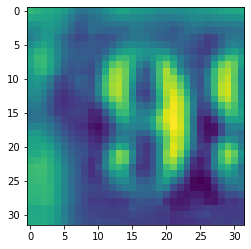

In [42]:
#Showing image 1
plt.imshow(X_test[5].reshape(32,32))

In [43]:
#Predicting the digit
keras_model_final.predict_classes(X_test)[5]

9

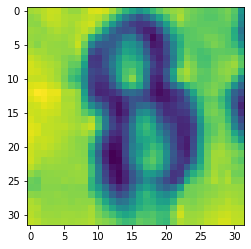

In [44]:
#Showing image 2
plt.imshow(X_test[10].reshape(32,32))

In [45]:
#Predicting the digit
keras_model_final.predict_classes(X_test)[10]

8

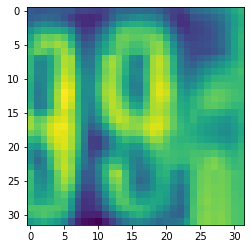

In [46]:
#Showing image 3
plt.imshow(X_test[112].reshape(32,32))

In [47]:
#Predicting the digit
keras_model_final.predict_classes(X_test)[112]

9

In [48]:
#Predicting for all images
y_pred=keras_model_final.predict_classes(X_test)
print(y_pred)

[6 7 2 ... 7 9 2]


## 5. Printing Classification Accuracy Metric Report

In [49]:
# show a final classification report demonstrating the accuracy of the classifier
print("EVALUATION ON TESTING DATA")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

EVALUATION ON TESTING DATA
[[1623   19   13   16   19   21   42    9   23   29]
 [  91 1429   29   36   54   52   38   45   25   29]
 [  38   25 1457   39   33   59   15   38   49   50]
 [  41   17   34 1212   17  245   33   22   60   38]
 [  47   37   19   27 1525   31   50    9   32   35]
 [  25    9    7   62    8 1482   99   11   33   32]
 [  69   12   14   12   31   71 1534    5   64   20]
 [  68   52   61   28   20   45   12 1489   16   17]
 [  67   21   22   37   20   72  129    8 1398   38]
 [ 146   10   27   36   23   94   26   13   57 1372]]
              precision    recall  f1-score   support

           0       0.73      0.89      0.81      1814
           1       0.88      0.78      0.83      1828
           2       0.87      0.81      0.84      1803
           3       0.81      0.71      0.75      1719
           4       0.87      0.84      0.86      1812
           5       0.68      0.84      0.75      1768
           6       0.78      0.84      0.81      1832
         

## Conclusion
<ul>
    <li>In general, simple Adam optimiser NN is more accurate than a simple SGD optimiser NN.</li>
    <li>Using Batch Normalisation positively impacts accuracy in most cases.</li>
    <li>SGD with Batch Norm NN is performing better than Adam with Batch Norm NN.</li>
</ul>